In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    x[x < 0] = 0
    return x

In [4]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

In [5]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    
    z = x @ w
    a = sigmoid(z)
    activations[i] = a

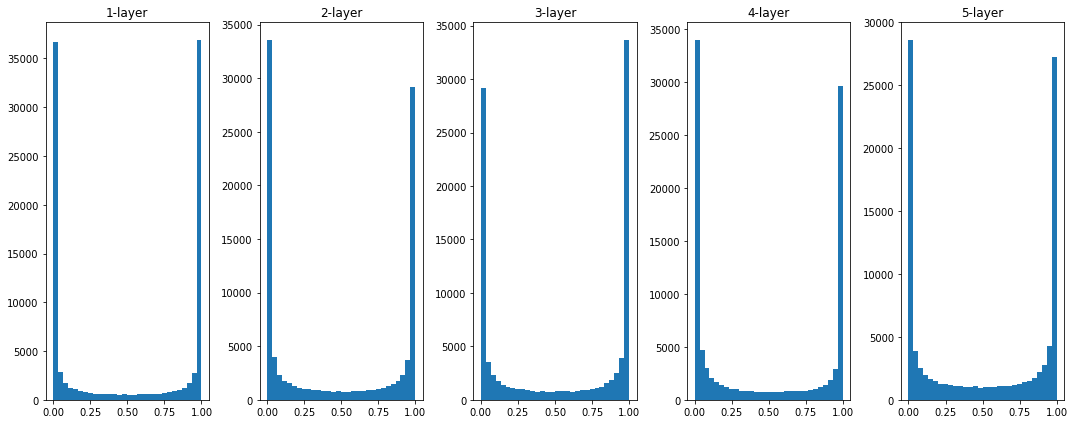

In [16]:
fig, axes = plt.subplots(1, len(activations), figsize=(15, 3))
for i, a in activations.items():
    axes[i].set_title(f"{i+1}-layer")
    axes[i].hist(a.flatten(), 30, range=(0,1))
fig.tight_layout()

In [31]:
def plot_weight_init_activation_hist(sample_size=1000, node_num=100, hidden_layer_size=5, std=0.01, activation_func=sigmoid, method=None):
    x = np.random.randn(sample_size, node_num)
    activations = {}
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]
        if method is None:
            w = np.random.randn(node_num, node_num) * std
        elif method == 'xavier':
            w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
        elif method == 'he':
            w = np.random.randn(node_num, node_num) * 2 / np.sqrt(node_num)
        
        z = x @ w
        a = activation_func(z)
        activations[i] = a
    
    fig, axes = plt.subplots(1, len(activations), figsize=(15, 6))
    for i, a in activations.items():
        axes[i].set_title(f"{i+1}-layer")
        axes[i].hist(a.flatten(), 30, range=(0, 1))
    fig.tight_layout()

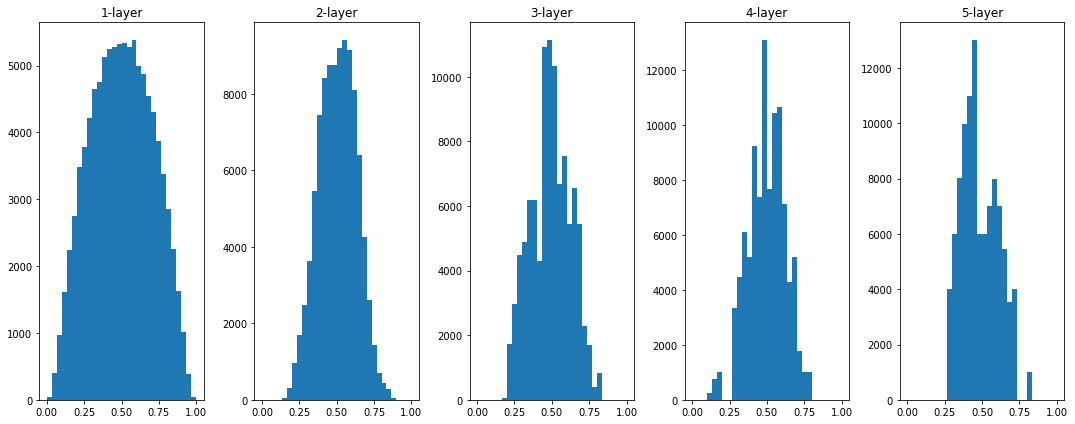

In [32]:
plot_weight_init_activation_hist(std=0.1)

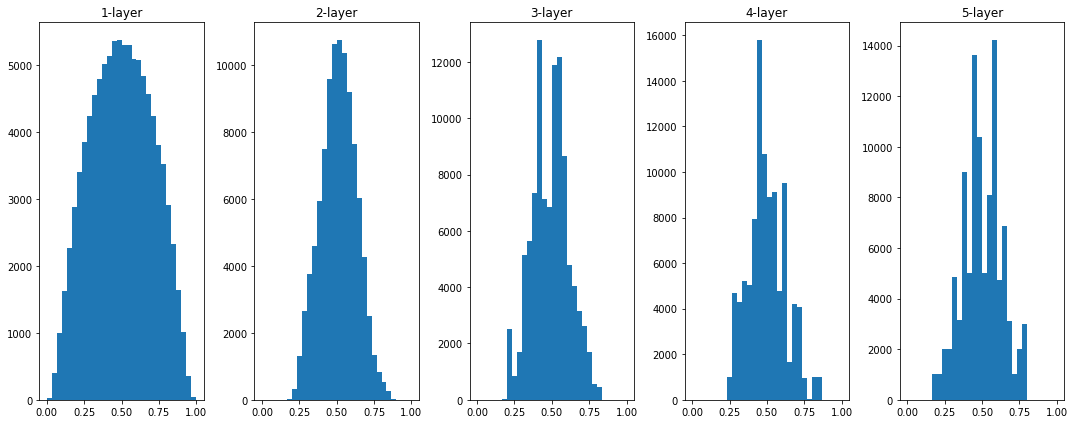

In [33]:
plot_weight_init_activation_hist(method='xavier')

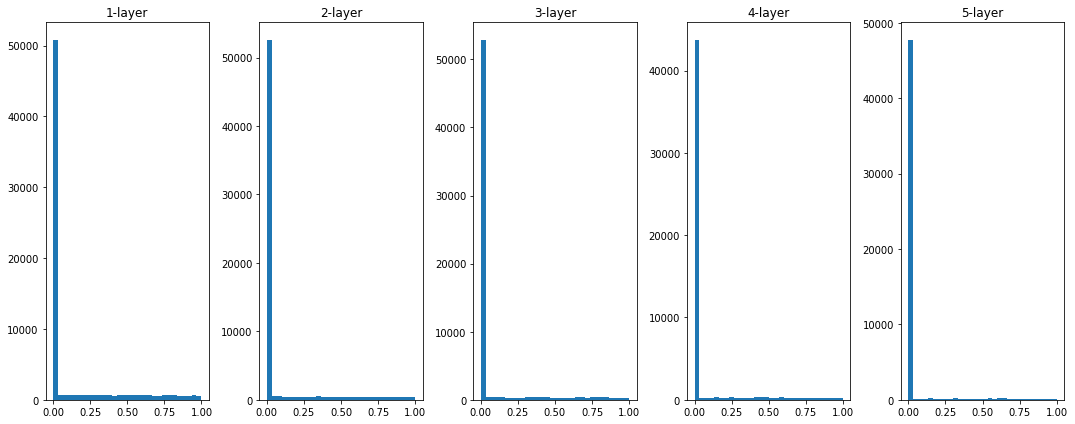

In [34]:
plot_weight_init_activation_hist(activation_func=relu, method='he')